# SI 370 FA 2017 - Homework 3: Statistics I

## Objectives
1. To build on your previous work with merging data sets
2. To review stacking/unstacking
3. To practice working with Seaborn
4. To start working with univariate statistics

## Please fill in...
### * Your name: AJ Goldstein
### * People you worked with: I worked by myself.

We're going to return to the synthetic student performace data from Homework 1, but rather than just pretending that we're merging it with our survey data, we're going to tackle the entire data set.  We're going to seek answers to some questions about the data.  It's a good idea to quickly scan down the questions for this Homework assignment (below, in <font color="red">red</font>) so you can get a sense of what we're going to be doing.

First, load up everything we need

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
sns.set(style='ticks', color_codes=True)

/Users/AJGoldstein/anaconda/envs/si370/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


And make things easier to see

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

Now load our data files.  The descriptions of the data can be found on the [PLA Wiki](https://github.com/bkoester/PLA/wiki) under the Data heading.  It is replicated here for your convenience.


## Data
These functions all run on synthetic data provided with this project, but may in principle be run on similarly-formatted data from local sources. The data come in two tables: a student-course table (`student.course.csv`) and student-record table (`student.record.csv`).

### Term Table
This is a lookup table that maps our integer academic TERMs to human readable terms: FA 2006 = Fall 2006, WN=Winter, SP=Spring, SS =Spring/Summer, Su=Summer, etc.

### Student Record Table

This includes one-time information about a student: major, gender, etc. This is one line per student.  
- **ANONID**: Anonymous ID of the student, used to merge with columns of the student course table.    
- **ADMIT_TERM**: Term of admission. Terms are have be re-numbered to preserve anonymity. The same consistent numbering convention is used for all “TERM” fields. These TERMS go back to TERM=53. 
- **HSGPA**:  HSGPA as recomputed by admissions. Note that this contains ‘0’ as well, whose meaning is unclear.  
- **LAST_ACT_MATH_SCORE**: ACT math score.  
- **LAST_ACT_ENGL_SCORE**: ACT English score  
- **LAST_ACT_READ_SCORE**: ACT reading score
- **LAST_ACT_SCIRE_SCORE**: ACT science score
- **LAST_ACT_COMP_SCORE**: ACT composite score
- **LAST_SATI_VERB_SCORE**: SAT verbal score  
- **LAST_SATI_MATH_SCORE**: SAT math score
- **LAST_SATI_TOTAL_SCORE**: SAT total score
- **MAJOR1_DESCR**: Full name of first undergraduate major degree.  
- **MAJOR2_DESCR**: Full name of second undergraduate major degree.  
- **MAJOR3_DESCR**: Full name of third undergraduate major degree.  

*NOTE: THE ORDER OF MAJORS IN THESE IS RANDOM
- **MAJOR1_TERM**: The term that MAJOR1 was received, otherwise NA. Degree data become incomplete before TERM 80. Note that degree information goes back to at least TERM 10.
- **MAJOR2_TERM**: The term that MAJOR2 was received, otherwise NA.  
- **MAJOR3_TERM**: The term that MAJOR3 was received, otherwise NA.  
- **MAJOR1_DEPT**: The department that awarded MAJOR1. This collapses some rare majors and may be preferable for anonymity.  
- **MAJOR2_DEPT**: The department that awarded MAJOR2. This collapses some rare majors and may be preferable for anonymity.
- **MAJOR3_DEPT**: The department that awarded MAJOR3. This collapses some rare majors and may be preferable for anonymity. 
- **STDNT_GROUP1**: Students are allowed up to two groups of 7 available groups denoted A-G.  
- **STDNT_GROUP2**: “”  

### Student Course Table
Courses taken by a student and grade received are recorded here. This may be multiple lines per student.

- **ANONID**: Anonymous ID of the student, used to merge with columns of the student record table.  
- **SUBJECT**: Subject area of course.  
- **CATALOG_NBR**: Catalog number of the course.  
- **GRD_PTS_PER_UNIT**: Discrete numerical field ranging from 0-4, indicating the grade received.  
- **GPAO**: Grade point in all other classes over the student's career, up to and including the term the course was taken.
- **CUM_GPA**: Actual CUM_GPA as of the term the course was taken.  
- **DIV**: The division (P=professional, H=Humanities,SS=Social Sciences, S=Science,E=Engineering,O=Other) of the SUBJECT.  
- **ANON_INSTR_ID**: Anonymized instructor ID. I haven’t used this field much yet.  
- **TERM**: Term the course was taken. This reaches TERM=60, which is also the minimum TERM for the ADMIT_TERM field in the student-record table.  


In [4]:
studentRecord = pd.read_csv('student.record.csv')
studentCourse = pd.read_csv('student.course.csv')
terms = pd.read_csv('term.table.txt',sep='\t') 

Join the two tables together (based on ANONID) so that every record from the Student Course has associated 
with it the information about the student from the Student Record Table.


In [5]:
joined = pd.merge(studentCourse,studentRecord,how='left')

Filter the joined tables so that you discard all rows in which the GRD_PTS_PER_UNIT is greater than zero and
less than or equal to 4.3.

In [6]:
# insert here code to filter data
joined = joined[(joined.GRD_PTS_PER_UNIT > 0) | (joined.GRD_PTS_PER_UNIT < 4.3)]

Create a new column that combines the SUBJECT column and the CATALOG_NBR column to create a COURSE column.  So if SUBJECT is "STATS" and CATALOG_NBR is 250, the result would be "STATS250".

In [7]:
# insert here code to create the "COURSE" column
joined['COURSE'] = joined['SUBJECT']+joined['CATALOG_NBR'].map(str)
del joined['SUBJECT']
del joined['CATALOG_NBR']
joined.head()

ANONID  GRD_PTS_PER_UNIT      GPAO DIV  ANON_INSTR_ID  TERM MAJOR3_DESCR  \
0      26               2.0  3.343636   P           2920    79          NaN   
1     114               2.0  2.817857   P           2920    83          NaN   
2     121               4.0  4.000000   P            201   111          NaN   
3     125               1.3  3.639063   P           3360    84          NaN   
4     180               3.0  3.846154   P           2920   107          NaN   

  MAJOR2_DESCR                 MAJOR1_DESCR  HSGPA   ...    STDNT_GROUP1  \
0          NaN          General Studies BGS    3.9   ...             NaN   
1          NaN                 Economics BA    3.7   ...             NaN   
2          NaN  Business Administration BBA    3.7   ...             NaN   
3          NaN                Psychology BS    3.8   ...             NaN   
4          NaN  Business Administration BBA    3.9   ...             NaN   

   STDNT_GROUP2                                   MAJOR1_DEPT  MAJOR2_DEPT  \
0           NaN  College of Literature, Science, and the Arts          NaN   
1           NaN                          Economics Department          NaN   
2           NaN             School of Business Administration          NaN   
3           NaN                         Psychology Department          NaN   
4           NaN             School of Business Administration          NaN   

   MAJOR3_DEPT  ADMIT_TERM  MAJOR1_TERM  MAJOR2_TERM MAJOR3_TERM  COURSE  
0          NaN        73.0         89.0          NaN         NaN  ACC272  
1          NaN        78.0         93.0          NaN         NaN  ACC272  
2          NaN       106.0        119.0          NaN         NaN  ACC272  
3          NaN        78.0         94.0          NaN         NaN  ACC272  
4          NaN       102.0        115.0          NaN         NaN  ACC272  

[5 rows x 29 columns]

In [8]:
saveJoined = joined;

Pivot your data so you wind up with the mean GRD_PTS_PER_UNIT for males and females in each course

In [9]:
# insert here code to pivot your data
#genderizedGrades = joined.groupby(['COURSE','SEX'])['GRD_PTS_PER_UNIT'].mean()
#genderizedGrades = genderizedGrades.unstack()
genderizedGrades = joined.pivot_table(index = 'COURSE', columns = 'SEX', values = 'GRD_PTS_PER_UNIT')
genderizedGrades.head()

SEX                 F         M
COURSE                         
ACC271       2.447549  2.677437
ACC272       2.806201  2.909209
AMCULT240    3.423475  3.096032
AMCULT374    3.352483  3.174574
ANTHRBIO161  3.272691  3.184380

Use that pivoted data to calculate the difference between males and females for the mean GRD_PTS_PER_UNIT.

In [10]:
# insert here code to calculate the difference between the M and F means
genderizedGrades['diff'] = genderizedGrades['F'] - genderizedGrades['M']

In [11]:
# and calculate the absolute differences
genderizedGrades['diff'] = abs(genderizedGrades['F'] - genderizedGrades['M'])

In [12]:
# then show the values that we want
genderizedGrades['diff']

COURSE
ACC271         0.229888
ACC272         0.103008
AMCULT240      0.327443
AMCULT374      0.177909
ANTHRBIO161    0.088310
ANTHRBIO368    0.198599
ANTHRCUL101    0.141998
ARTDES300      0.107982
ASIAN230       0.210716
ASTRO106       0.011288
BE300          0.237417
BIOLOGY105     0.225024
BIOLOGY118     0.208603
BIOLOGY171     0.119840
BIOLOGY172     0.233754
BIOLOGY173     0.021611
BIOLOGY225     0.135920
BIOLOGY226     0.081645
BIOLOGY305     0.153253
BIOLOGY310     0.138027
BIOLOGY311     0.130434
BIT200         0.074723
BUDDHST230     0.396014
CHEM125        0.018781
CHEM126        0.025062
CHEM130        0.255841
CHEM210        0.194585
CHEM211        0.110791
CHEM215        0.202098
CHEM216        0.042337
                 ...   
PSYCH280       0.194988
PSYCH290       0.159916
PSYCH303       0.246845
PSYCH330       0.012361
PSYCH340       0.168562
PSYCH350       0.347170
PSYCH360       0.272800
PSYCH370       0.231596
PSYCH380       0.223797
PSYCH390       0.317412
RELIGION2

# <font color="red">Q1: In what proportion of courses do women outperform men?</font>

In [13]:
# show your code here
genderizedGrades['sign'] = np.where(genderizedGrades['diff'] > 0, 'Positive', 'Negative')
womenWin = genderizedGrades[genderizedGrades['sign'] == 'Positive']
womenWinPercentage = len(womenWin)/len(genderizedGrades)
womenWinPercentage

1.0

<font color="red">37%</font>

#  <font color="red">Q2: List the 5 courses that represnt the largest (absolute) difference in mean between males and females along with the value of the difference.

In [14]:
# show your code here
top5Diff = genderizedGrades.nlargest(5, 'diff')
courseNames = top5Diff.index
top5Diff

SEX                F         M      diff      sign
COURSE                                            
CMPTRSC280  1.945783  2.349241  0.403458  Positive
BUDDHST230  3.626923  3.230909  0.396014  Positive
SPANISH101  3.185170  2.812277  0.372893  Positive
ECON101     2.424861  2.784909  0.360047  Positive
PSYCH350    3.374767  3.027596  0.347170  Positive

# <font color="red">Q3: Use sns.distplot(...) to show the distributions of GRD_PTS_PER_UNIT of males and females for each of those 5 courses.</font>
You should have a total of 5 plots, each with two distributions (one for males and one fof females).

In [15]:
# HEY! SPANISH101 only has one male!?!?
males = joined[(joined['COURSE'] == 'SPANISH101') & (joined['SEX'] == 'M')]['GRD_PTS_PER_UNIT'].astype(float)
males.head()

393599    4.0
393601    3.7
393602    4.0
393606    2.7
393607    3.7
Name: GRD_PTS_PER_UNIT, dtype: float64

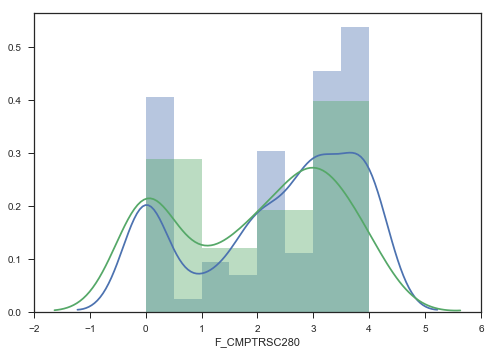

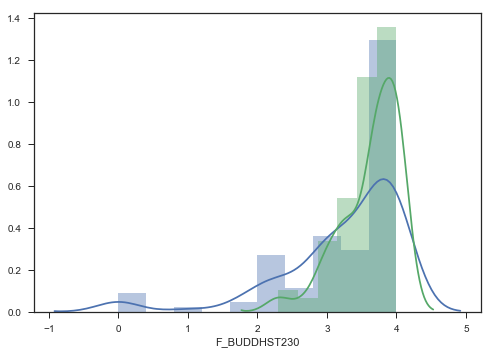

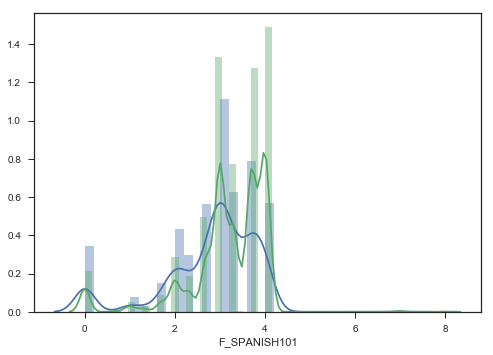

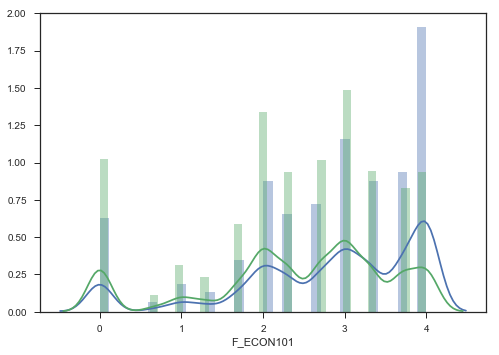

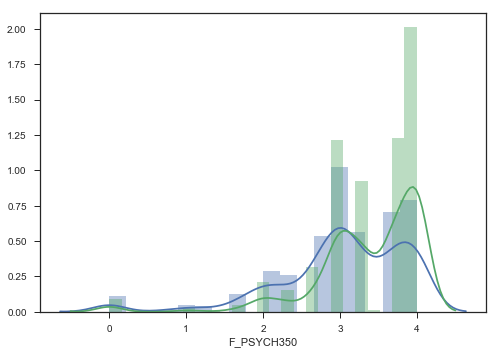

In [16]:
# insert your code here -- you might find it helpful to define a function that you call with the 
# different courses

# create data structures for storage
maleScores = pd.DataFrame(columns = ['M_'+courseNames])
femaleScores = pd.DataFrame(columns = ['F_'+courseNames])
plotFigs = []

# loop through all 5 courses
for num, course in enumerate(courseNames):
    
    # set new plot figure
    plt.figure(num)
    
    # store male & female scores for each course
    males = joined[(joined['COURSE'] == course) & (joined['SEX'] == 'M')]['GRD_PTS_PER_UNIT'].astype(float)
    females = joined[(joined['COURSE'] == course) & (joined['SEX'] == 'F')]['GRD_PTS_PER_UNIT'].astype(float)
    
    # plot male & female scores on same plot
    if len(males) > 1: gradeDist = sns.distplot(males, axlabel = 'M_'+course)
    if len(females) > 1:sns.distplot(females, ax=gradeDist, axlabel = 'F_'+course)
    
    # store plot to display later, clear the variable
    plotFigs.append(gradeDist)
    gradeDist = None

# <font color="red">Q4: Describe, in your own words, <font color="purple">how</font> the distributions histograms you generated do or do not show the differences in the means you reported in Q2

<font color="red">As you go through the above, you can see the two distributions (green:female, blue:male) converging on top of each other. This displays the differences in means reported in Q2 accurately because with each course listed, the difference between genders lessens.</font>

# Time to learn something new

We learned about pivot, stack, unstack, and pivot_table earlier in the course.  What we didn't learn was how to "unpivot" data.  In pandas, you use the "melt" function to do that.  You will need to use melt() for the next step.

The Student Record data set has three columns to represent the departments that correspond to the first three majors that each student has declared.  The order of those isn't important. Not all students have three majors, so some of those fields will be blank.

We want to get a list of all the departments that each student is in, for every row in the joined table (i.e. the one you generated earlier that joins Student Course and Student Record). So if a student was in a major that belonged to the Psychology Department and another one that belonged to "English Language & Literature Dept", and that student had taken STATS250 and ECON101, there would be 4 rows for that student in the resulting table: one row that indicated the student was in the Psychology Department and had taken STATS250, a second one that indicated the student was in English and had taken STATS250, a third one that indicated they were in Psychology and had taken ECON101, and a fourth one indicating they were in English and had taken ECON 101.  That's what we mean by "unpivoting" (or, in our case, melt()ing).

Here's what the syntax for the melt() is going to look like:

```
joined.melt(id_vars='ANONID',
                     value_vars=['MAJOR1_DEPT','MAJOR2_DEPT','MAJOR3_DEPT'],
                     value_name='DEPT',
                     var_name='DEPT_NBR')
```

Copy that below, and assign it to ```melted```

The following code assumes the joined DataFrame you generated above is called "joined"

In [17]:
melted = joined.melt(id_vars='ANONID',
                     value_vars=['MAJOR1_DEPT','MAJOR2_DEPT','MAJOR3_DEPT'],
                     value_name='DEPT',
                     var_name='DEPT_NBR')

Now take a look at melted

In [18]:
melted.head()

ANONID     DEPT_NBR                                          DEPT
0      26  MAJOR1_DEPT  College of Literature, Science, and the Arts
1     114  MAJOR1_DEPT                          Economics Department
2     121  MAJOR1_DEPT             School of Business Administration
3     125  MAJOR1_DEPT                         Psychology Department
4     180  MAJOR1_DEPT             School of Business Administration

We don't really care about the DEPT_NBR column, but it's not causing problems so we can just leave it there.

Next, we want to drop the NaN values (using .dropna()), and then merge it with the "joined" dataframe you generated earlier.

Finally, drop all duplicate rows (.drop_duplicates()).

In [19]:
melted.dropna();
melted.drop_duplicates();

# <font color="red">Q5: Do students in majors from the Psychology Department do better in PSYCH360 than students who are not in Psychology Department majors?

Use the resulting table to create a plot to visually investigate the differences of students' GRD_PTS_PER_UNIT in PSYCH360, comparing the GRD_PTS_PER_UNIT for students in Psychology Department majors vs. those who were not in Psychology Department majors.  Based on your plots, answer the question.

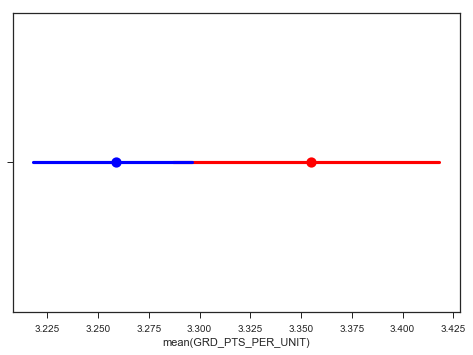

In [29]:
# grab ANONID's for Psychology majors and non-Psychology majors
psychMajors = melted[melted['DEPT'] == 'Psychology Department']['ANONID']
nonPsychMajors = melted[melted['DEPT'] != 'Psychology Department']['ANONID']

# pull their grade scores in Psych360
psychScores = joined[(joined['ANONID'].isin(psychMajors)) & (joined['COURSE'] == 'PSYCH360')]['GRD_PTS_PER_UNIT']
nonPsychScores = joined[joined['ANONID'].isin(nonPsychMajors) & (joined['COURSE'] == 'PSYCH360')]['GRD_PTS_PER_UNIT']

# graph both groups' scores side-by-side
psych360Grades = sns.pointplot(psychScores, color = 'red')
sns.pointplot(nonPsychScores, color = 'blue', ax=psych360Grades)

<font color="red">Yes, students in the Psych department (red) do better than non-Psych majors (blue), as you can see in the point-plot above</font>

Finally, we are going to use the multiplePlots() function from our in-class lab to investigate the distribution of GPAO of students in STATS250 who are in majors from the Psychology Department, split by sex.

You'll need to generate two grids (one for males and one for females), each containing four plots (a histogram of the distribution, a run sequence, a lag plot, and a Q-Q plot) for the GPAO variable.  Select only students who are in majors from the Psychology Department who are taking STATS250.

# <font color="red">Q6: Do the GPAO scores for males and females taking STATS250 who are in majors from the Psychology Department appear to be normally distributed? Explain why or why not.

In [30]:
# generate the 4 diagnostic plots given a series
def fourPlot( series ):
    sns.set(font_scale=1)
    fig, axs = plt.subplots(2,2)
    plt.tight_layout(pad=0.4, w_pad=4, h_pad=2.0)

    # Histogram
    sns.distplot(series, ax=axs[0,0])
    
    # Lag plot
    lag = series.copy()
    lag = np.array(lag[:-1])
    current = series[1:]
    ax = sns.regplot(current,lag,fit_reg=False, ax=axs[0,1])
    ax.set_ylabel("y_i-1")
    ax.set_xlabel("y_i")
    
    # QQ plot
    qntls, xr = stats.probplot(series, fit=False)
    sns.regplot(xr,qntls, ax=axs[1,0],ci=0)
    
    # Run sequence
    ax = sns.regplot(np.arange(len(series)),series, ax=axs[1,1],ci=0)
    ax.set_ylabel("val")
    ax.set_xlabel("i")
    sns.set(font_scale=1.5)

In [31]:
# select relevant grades
malePsych_STATS250 = joined[(joined['ANONID'].isin(psychMajors)) & (joined['COURSE'] == 'STATS250') & (joined['SEX'] == 'M')]['GRD_PTS_PER_UNIT']
femalePsych_STATS250 = joined[(joined['ANONID'].isin(psychMajors)) & (joined['COURSE'] == 'STATS250') & (joined['SEX'] == 'F')]['GRD_PTS_PER_UNIT']

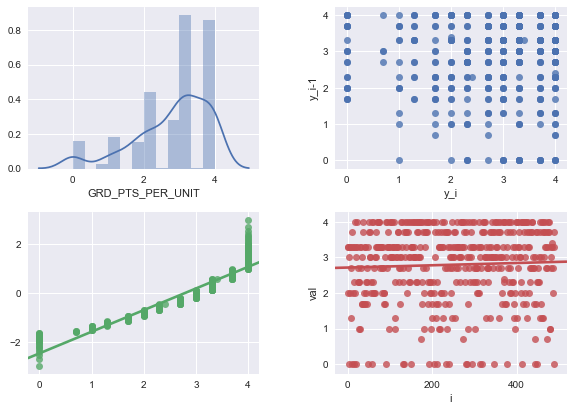

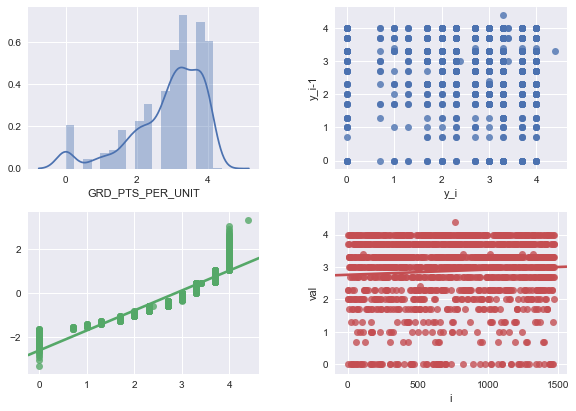

In [32]:
# call the multiplePlots function here.
fourPlot(malePsych_STATS250)
fourPlot(femalePsych_STATS250)

<font color="red">No, they both appear to be skewed to the left. This is likely due to the fact that they have a disproportionately higher average GPA in STATS courses.</font>

# <font color="red">End of Homework 3</font>